In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calander
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pyarrow.parquet as pq

yellow_01 = pq.read_table(source='/content/drive/MyDrive/Colab Notebooks/YellowTaxi/yellow_tripdata_2023-01.parquet').to_pandas().rename(columns=str.lower)
yellow_02 = pq.read_table(source='/content/drive/MyDrive/Colab Notebooks/YellowTaxi/yellow_tripdata_2023-02.parquet').to_pandas().rename(columns=str.lower)
yellow_07 = pq.read_table(source='/content/drive/MyDrive/Colab Notebooks/YellowTaxi/yellow_tripdata_2023-07.parquet').to_pandas().rename(columns=str.lower)
yellow_08 = pq.read_table(source='/content/drive/MyDrive/Colab Notebooks/YellowTaxi/yellow_tripdata_2023-08.parquet').to_pandas().rename(columns=str.lower)



In [39]:
yellow_01.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


In [40]:
yellow_02.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.913955e+06,2913955,2913955,2.837138e+06,2.913955e+06,2.837138e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.913955e+06,2.837138e+06,2.837138e+06
mean,1.731282e+00,2023-02-15 00:38:01.639923,2023-02-15 00:54:02.594499,1.352847e+00,3.868058e+00,1.514554e+00,1.662570e+02,1.642317e+02,1.182896e+00,1.822038e+01,1.560472e+00,4.878752e-01,3.384825e+00,5.113983e-01,9.813052e-01,2.689848e+01,2.285299e+00,9.677754e-02
min,1.000000e+00,2008-12-31 23:05:06,2008-12-31 23:31:24,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.540500e+02,-7.500000e+00,-5.000000e-01,-9.300000e+01,-5.700000e+01,-1.000000e+00,-7.575500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-02-08 08:43:13,2023-02-08 08:59:34,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.548000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-02-14 22:33:21,2023-02-14 22:48:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.020000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-02-22 08:34:18,2023-02-22 08:50:06,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.030000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-03-07 13:01:28,2023-03-07 13:11:17,9.000000e+00,3.350043e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.203100e+03,2.080000e+01,4.000000e+00,4.829000e+02,1.099000e+02,1.000000e+00,2.208100e+03,2.750000e+00,1.250000e+00
std,4.524952e-01,NaN,NaN,8.891265e-01,2.684273e+02,6.633395e+00,6.413230e+01,6.975406e+01,5.297219e-01,1.749819e+01,1.792708e+00,1.006192e-01,3.838069e+00,2.024488e+00,1.873103e-01,2.184110e+01,7.609081e-01,3.388268e-01


In [4]:
# combine the monthly data as a season
winter = pd.concat([yellow_01, yellow_02]).reset_index(drop=True)
summer = pd.concat([yellow_07, yellow_08]).reset_index(drop=True)

In [5]:
# labeling dataset as winter and summer

winter['season'] = 'winter'
summer['season'] = 'summer'
# remove any invalid date
winter = winter[(winter['tpep_pickup_datetime'] >= '2023-01-01 00:00:00')
    & (winter['tpep_pickup_datetime'] <= '2023-02-28 23:59:59')
    & (winter['tpep_dropoff_datetime'] >= '2023-01-01 00:00:00')
    & (winter['tpep_dropoff_datetime'] <= '2023-02-28 23:59:59')]
summer = summer[(summer['tpep_pickup_datetime'] >= '2023-07-01 00:00:00')
    & (summer['tpep_pickup_datetime'] <= '2023-08-31 23:59:59')
    & (summer['tpep_dropoff_datetime'] >= '2023-07-01 00:00:00')
    & (summer['tpep_dropoff_datetime'] <= '2023-08-31 23:59:59')]




In [45]:
winter.shape

(5979992, 20)

In [44]:
summer.shape

(5730099, 20)

In [6]:
data = pd.concat([winter.sample(40000), summer.sample(40000)]).reset_index(drop=True)

In [7]:
# extract day and time, the calculate the duration of the trip
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['date'] = data['tpep_pickup_datetime'].dt.normalize()
data['time'] = data['tpep_pickup_datetime'].dt.hour
data['weekday'] = data['date'].dt.day_name()
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'] / np.timedelta64(1, 'm')

In [8]:
# identifying holidays
cal = calander()
holidays = cal.holidays(start='2023-01-01', end='2023-12-31')
data['holiday'] = data['date'].isin(holidays)
data['week'] = data['date'].dt.dayofweek
data.loc[data['week'] >= 5, 'day_type'] = "weekend"
data.loc[data['week'] < 5, 'day_type'] = "workday"
data.loc[data['holiday'] == True, 'day_type'] = "holiday"
data = data.drop(['holiday', 'week'], axis=1)

In [9]:
# calculate tip percentage using tip amount and total amount
data['tip_percent'] = (data.tip_amount / data.total_amount) * 100

In [10]:
# classify a trip's time slot

def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

data['time_desc'] = data['time'].apply(time_slots)

In [11]:
# drop features that we are not interested in
data = data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge'], axis=1)

In [12]:
# descriptive statistics for continuous attributes
data[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'duration', 'tip_percent']].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,duration,tip_percent
count,77884.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,79983.000000
mean,1.380181,4.108037,19.057188,3.409721,0.571386,27.840133,16.522541,11.639750
std,0.907541,95.594820,18.951617,3.950743,2.181008,23.440590,41.786631,7.713098
min,0.000000,0.000000,-500.000000,-0.900000,-25.000000,-481.000000,-14.000000,-40.883978
25%,1.000000,1.070000,9.300000,1.000000,0.000000,15.600000,7.333333,3.968254
50%,1.000000,1.800000,13.500000,2.740000,0.000000,20.600000,12.033333,16.531165
75%,1.000000,3.450000,21.200000,4.280000,0.000000,29.760000,19.400000,16.666667
max,8.000000,21187.400000,591.700000,90.000000,86.550000,603.500000,1439.666667,97.222222


<Axes: xlabel='trip_distance', ylabel='Density'>

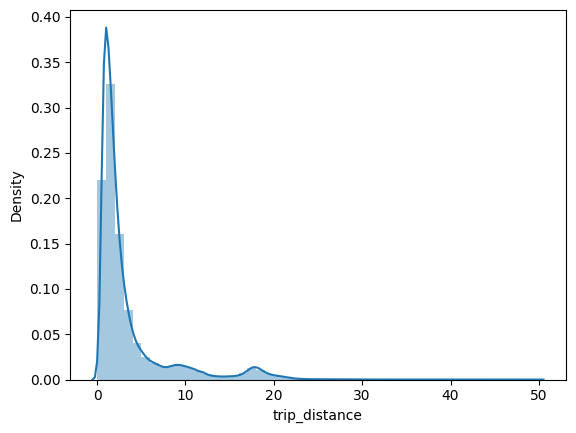

In [ ]:
sns.distplot(data[(data['trip_distance'] > 0) & (data['trip_distance'] <= 50)]['trip_distance'])

In [13]:
# remove invalid data
# passenger == 0
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 7)]

# trip_distance <= 0
data = data[(data['trip_distance'] > 0) & (data['trip_distance'] <= 100)]

# exclude duration longer than 180 mins
data = data[(data['duration'] > 0) & (data['duration'] <= 180)]

# payment method other than cash and credit card
data = data[(data['payment_type'] != 3) & (data['payment_type'] != 4) & (data['payment_type'] != 5) & (data['payment_type'] != 6)]

# exclude instances with fare amount less than 2.5
data = data[(data['fare_amount'] >= 2.5) & (data['fare_amount'] <= 250)]

# remove trips with tip precentage over 50%
data = data[(data['tip_percent'] >= 0) & (data['tip_percent'] <= 50)]

# PU and DO location id not within NYC taxi zone
data = data[(data['pulocationid'] >= 1) & (data['pulocationid'] <= 263) & (data['dolocationid'] >= 1) & (data['dolocationid'] <= 263)]


In [57]:
data.shape

(72717, 21)

In [58]:
data

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,tip_amount,tolls_amount,...,congestion_surcharge,airport_fee,season,date,time,weekday,duration,day_type,tip_percent,time_desc
0,2,2.0,0.90,1.0,164,233,1,9.3,2.66,0.00,...,2.5,0.00,winter,2023-02-26,19,Sunday,8.216667,weekend,16.666667,Evening
1,2,1.0,1.40,1.0,233,230,1,10.7,3.44,0.00,...,2.5,0.00,winter,2023-01-20,19,Friday,9.816667,workday,16.666667,Evening
2,2,2.0,0.51,1.0,162,162,1,5.1,2.32,0.00,...,2.5,0.00,winter,2023-01-06,19,Friday,2.633333,workday,16.666667,Evening
3,2,6.0,2.85,1.0,231,170,1,18.4,2.00,0.00,...,2.5,0.00,winter,2023-01-08,17,Sunday,17.483333,weekend,8.196721,Evening
4,2,1.0,0.92,1.0,161,186,1,11.4,3.08,0.00,...,2.5,0.00,winter,2023-02-02,13,Thursday,11.366667,workday,16.666667,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1,2.0,1.40,1.0,238,142,1,10.0,2.00,0.00,...,2.5,0.00,summer,2023-07-27,10,Thursday,10.416667,workday,12.500000,Morning
79996,2,4.0,1.39,1.0,231,211,1,7.9,2.88,0.00,...,2.5,0.00,summer,2023-08-14,19,Monday,5.133333,workday,16.666667,Evening
79997,2,2.0,8.42,1.0,138,140,1,36.6,10.00,6.55,...,2.5,1.75,summer,2023-07-26,17,Wednesday,29.100000,workday,15.060241,Evening
79998,2,1.0,2.80,1.0,170,262,1,17.7,4.54,0.00,...,2.5,0.00,summer,2023-07-20,23,Thursday,16.616667,workday,16.666667,Late Night


In [14]:
# convert passenger amount into three level
def passenger_convert(row):
    if (row >= 1) & (row <= 2):
        val = "small"
    elif (row > 2) & (row < 5):
        val = "medium"
    else:
        val = "high"
    return val

data['passenger_count'] = data['passenger_count'].apply(passenger_convert)

In [15]:
data['passenger_count'].value_counts()

passenger_count
small     66644
medium     4546
high       1686
Name: count, dtype: int64

In [16]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/weather01082023.csv')
weather['TAVG'] = (weather['TMAX'] + weather['TMIN']) / 2
weather = weather.drop(['STATION', 'NAME', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'TMAX', 'TMIN'], axis=1)
weather['DATE'] = pd.to_datetime(weather['DATE'])

weather.describe()



,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,WDF2,WDF5,WSF2,WSF5
count,243,243.000000,0.0,243.000000,243.000000,243.000000,243.000000,243.000000,242.000000,243.000000,242.000000
mean,2023-05-02 00:00:00,4.639259,NaN,0.129547,0.009465,0.013169,59.376543,189.794239,190.904959,13.388889,22.080992
min,2023-01-01 00:00:00,0.670000,NaN,0.000000,0.000000,0.000000,15.000000,10.000000,10.000000,6.900000,11.000000
25%,2023-03-02 12:00:00,2.910000,NaN,0.000000,0.000000,0.000000,46.250000,70.000000,100.000000,10.100000,17.000000
50%,2023-05-02 00:00:00,4.470000,NaN,0.000000,0.000000,0.000000,61.000000,230.000000,225.000000,13.000000,21.000000
75%,2023-07-01 12:00:00,5.820000,NaN,0.065000,0.000000,0.000000,73.500000,280.000000,280.000000,16.100000,25.900000
max,2023-08-31 00:00:00,12.970000,NaN,2.460000,0.900000,2.000000,83.500000,360.000000,360.000000,29.100000,68.000000
std,NaN,2.216963,NaN,0.326184,0.085479,0.149349,15.275202,102.632493,99.521319,3.937350,6.879440


In [ ]:
weather.shape

(243, 11)

In [17]:
# merge weather dataset and taxi dataset
data = pd.DataFrame(pd.merge(data, weather, left_on='date', right_on='DATE')).drop('DATE', axis=1)

In [18]:
# Identify pickup and dropoff borough
zone_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv')
data = pd.DataFrame(pd.merge(data, zone_df[['LocationID', 'Borough']], left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
data = data.rename({'Borough':'PUborough'}, axis=1)
data = pd.DataFrame(pd.merge(data, zone_df[['LocationID', 'Borough']], left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
data = data.rename({'Borough':'DOborough'}, axis=1)

In [19]:
# Identify pick up and dropoff location thats from airport

data.loc[data['pulocationid'] == 132, 'PUborough'] = 'JFK'
data.loc[data['dolocationid'] == 132, 'DOborough'] = 'JFK'
data.loc[data['pulocationid'] == 138, 'PUborough'] = 'LaGuardia'
data.loc[data['dolocationid'] == 138, 'DOborough'] = 'LaGuardia'

In [20]:
# save to feather
data.to_feather('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/preprocessed_data/cleaned_2018.feather')

In [21]:
!pip uninstall contextily
!pip install contextily

Found existing installation: contextily 1.6.0
Uninstalling contextily-1.6.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/contextily-1.6.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/contextily/*
Proceed (Y/n)? Y
  Successfully uninstalled contextily-1.6.0
  Using cached contextily-1.6.0-py3-none-any.whl (17 kB)


In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import warnings

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [23]:
# read dataset
yellow_data = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/preprocessed_data/cleaned_2018.feather')

In [24]:
# split data according to season
yellow_winter = yellow_data[yellow_data['season'] == 'winter'].reset_index(drop=True)
yellow_summer = yellow_data[yellow_data['season'] == 'summer'].reset_index(drop=True)

In [73]:
yellow_winter.shape

(36494, 33)

In [74]:
yellow_summer.shape

(36223, 33)

In [25]:
# Read in the taxi zone shapefile
sf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zones.shp')
zone = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YellowTaxi/taxi_zone_lookup.csv")
sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

In [26]:
# Compute pickup and dropoff amount of each zone
pu_zone = yellow_data.groupby(['pulocationid'], as_index=False).size()
do_zone = yellow_data.groupby(['dolocationid'], as_index=False).size()
pu_zone = gpd.GeoDataFrame(pd.merge(pu_zone, sf, left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(do_zone, sf, left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
pu_zone = pu_zone.to_crs(epsg=3857)
do_zone = do_zone.to_crs(epsg=3857)

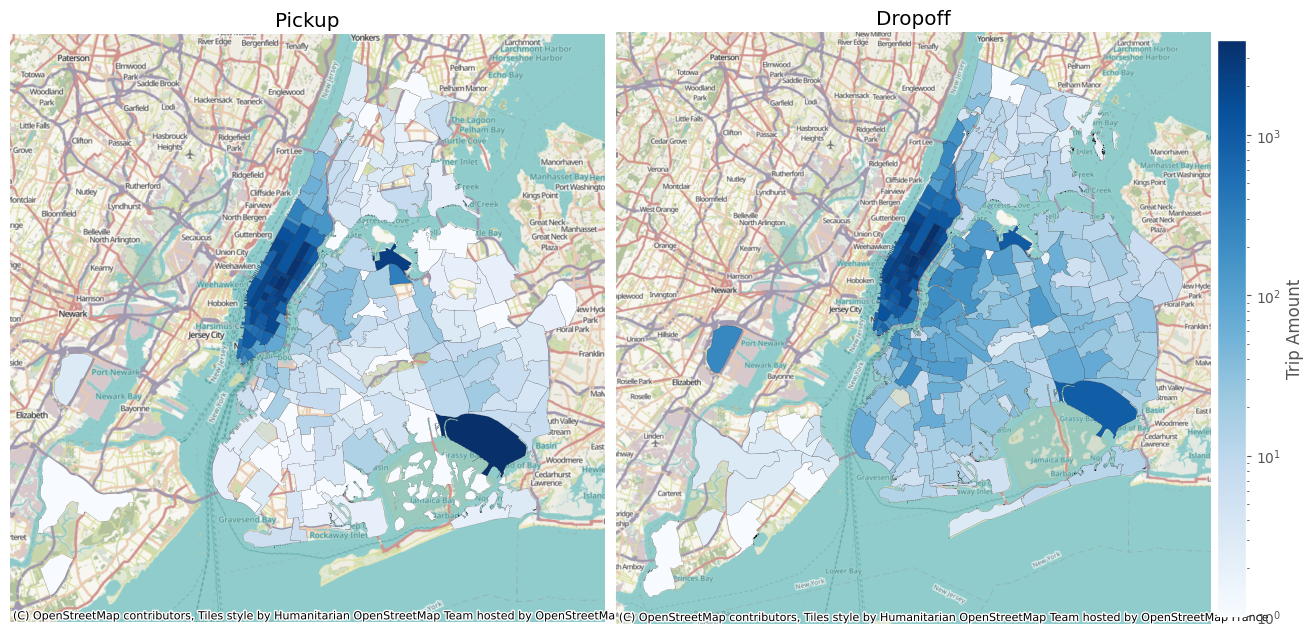

In [27]:
# plot geospatial visualisation to compare pickup and dropoff amount from each zone
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)
# create a normalized colorbar
vmin, vmax = pu_zone['size'].min(), pu_zone['size'].max()
axs[0] = pu_zone.plot(column='size', linewidth=0.09, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Blues', legend=False, ax=axs[0])
ctx.add_basemap(axs[0])
vmin, vmax = do_zone['size'].min(), do_zone['size'].max()
axs[1] = do_zone.plot(column='size', linewidth=0.1, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Blues', legend=False, ax=axs[1])
ctx.add_basemap(axs[1])
axs[0].set_title('Pickup')
axs[1].set_title('Dropoff')
axs[0].set_axis_off()
axs[1].set_axis_off()
# draw the color bar
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('Trip Amount')
plt.show()